In [30]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [31]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
#tweet_df = pd.read_csv('hateDetection_train.csv')
#tweet_df.head()

In [32]:
import nltk

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\AHMADULLAH
[nltk_data]     MAHMOOD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
#tweet_df = pd.read_csv('hateDetection_train.csv')
#tweet_df.head()

In [35]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
#tweet_df = pd.read_csv('hateDetection_train.csv')
#tweet_df.head()

In [36]:
import wordcloud

In [37]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [38]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
#tweet_df = pd.read_csv('hateDetection_train.csv')
#tweet_df.head()

In [39]:
tweet_df = pd.read_csv('train.csv')
tweet_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [40]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [41]:
# printing random tweets 
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

  bihday your majesty 

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   

 factsguide: society now    #motivation 



In [42]:
#creating a function to process the data
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [43]:
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)

In [44]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\AHMADULLAH
[nltk_data]     MAHMOOD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\AHMADULLAH
[nltk_data]     MAHMOOD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)

In [47]:
tweet_df = tweet_df.drop_duplicates('tweet')

In [48]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmarizer.lemmatize(word) for word in data]
    return data

In [49]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x))

NameError: name 'lemmarizer' is not defined

In [50]:
# printing the data to see the effect of preprocessing
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

user father dysfunctional selfish drags kids dysfunction run 

user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked 

bihday majesty 

model love u take u time ur 

factsguide society motivation 



In [51]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29345 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      29345 non-null  int64 
 1   label   29345 non-null  int64 
 2   tweet   29345 non-null  object
dtypes: int64(2), object(1)
memory usage: 917.0+ KB


In [52]:
tweet_df['label'].value_counts()

label
0    27352
1     1993
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

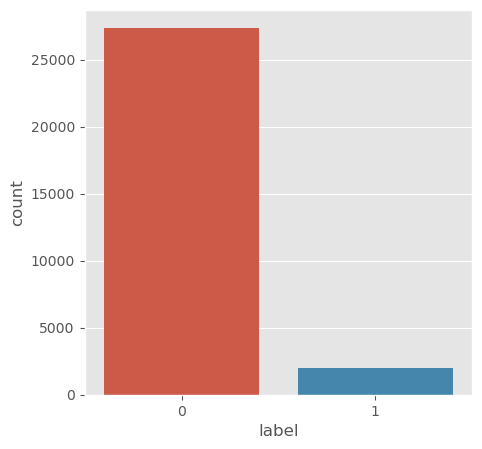

In [53]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)

Text(0.5, 1.0, 'Distribution of sentiments')

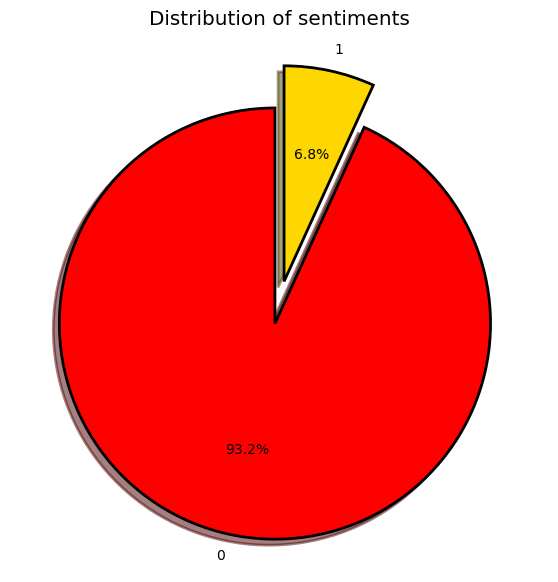

In [54]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [55]:
non_hate_tweets = tweet_df[tweet_df.label == 0]
non_hate_tweets.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


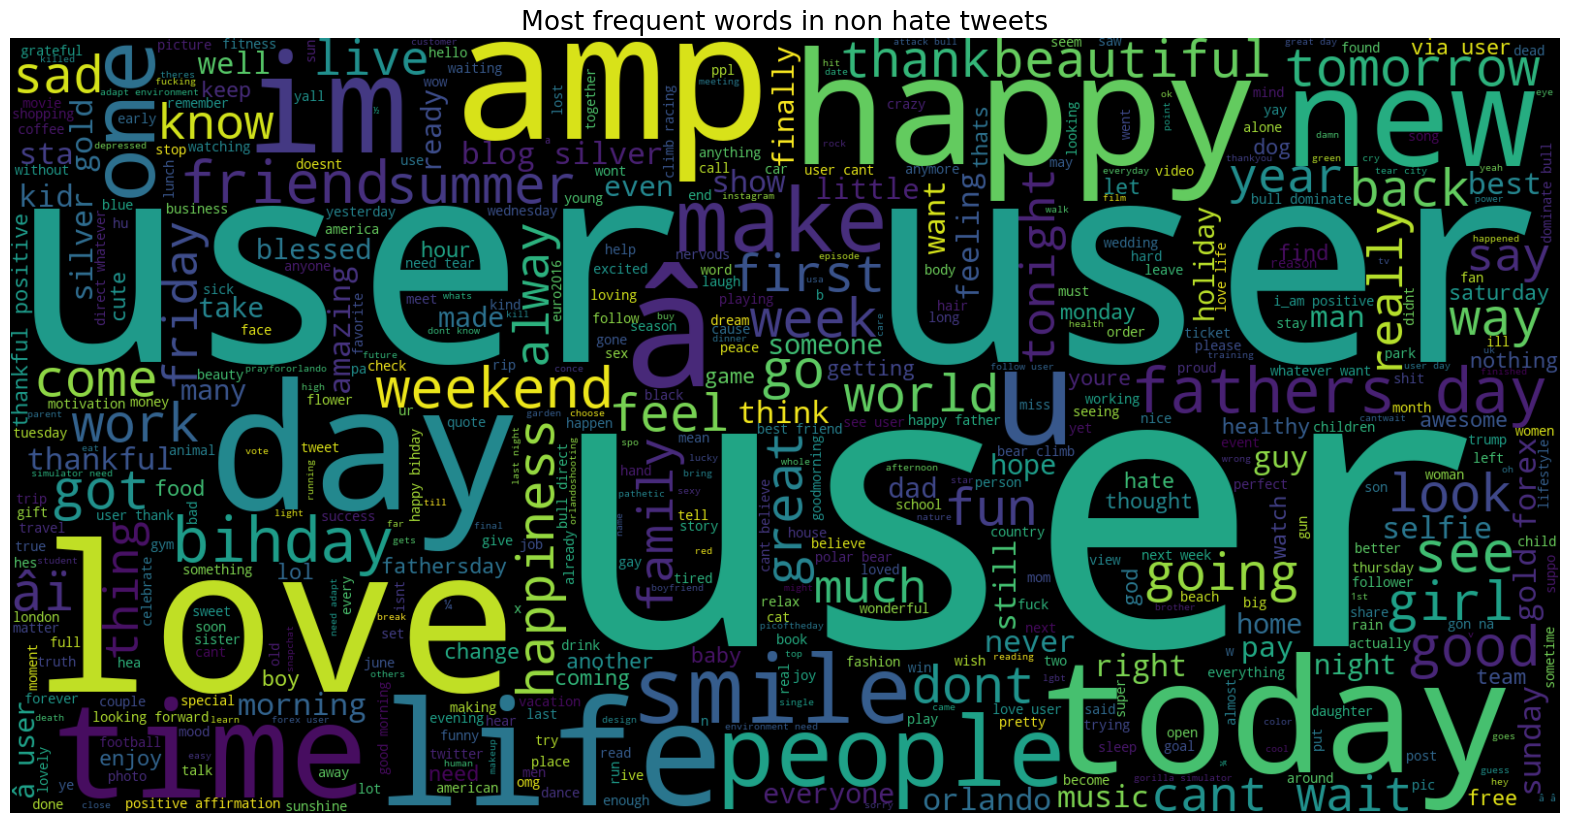

In [56]:
text = ' '.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19)
plt.show()

In [57]:
neg_tweets = tweet_df[tweet_df.label == 1]
neg_tweets.head()

,id,label,tweet
13,14,1,user cnn calls michigan middle school build wa...
14,15,1,comment australia opkillingbay seashepherd hel...
17,18,1,retweet agree
23,24,1,user user lumpy says prove lumpy
34,35,1,unbelievable 21st century wed need something l...


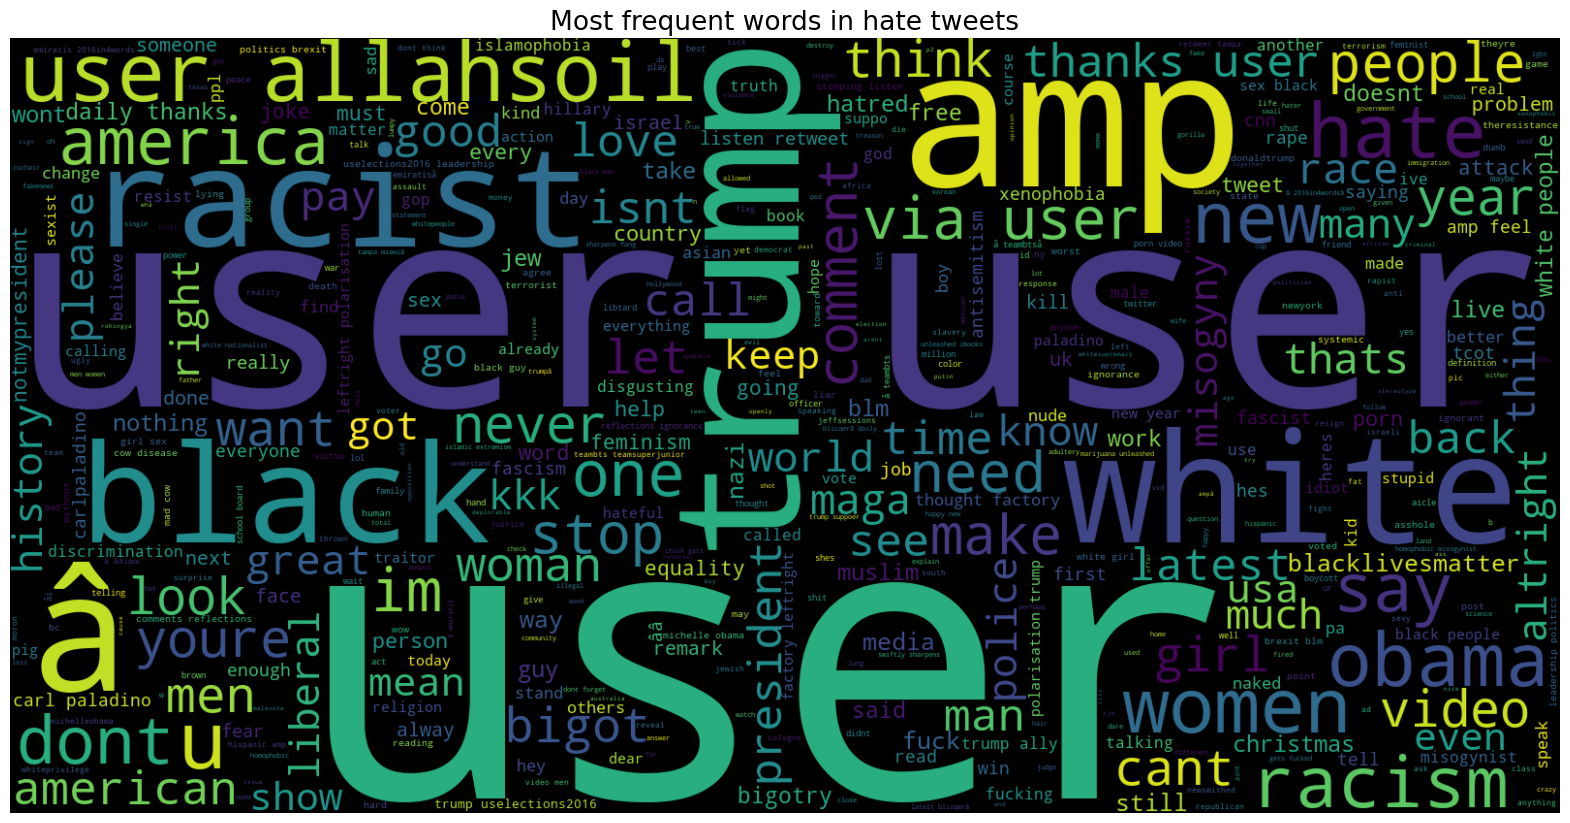

In [58]:
text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()

In [59]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(tweet_df['tweet'])

In [60]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 208579

First 20 features: 
['0000001' '0000001 polluting' '00027' '00027 photooftheday' '001' '0035'
 '00h30' '01' '01 4995' '01 7900' '01 blog' '01 croatia' '01 may'
 '01 shopalyssas' '0115' '0115 8599968' '0161' '0161 manny' '019'
 '019 previous']


In [61]:
X = tweet_df['tweet']
Y = tweet_df['label']
X = vect.transform(X)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [63]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (23476, 208579)
Size of y_train: (23476,)
Size of x_test:  (5869, 208579)
Size of y_test:  (5869,)


In [64]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 93.37%


In [65]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[5455    3]
 [ 386   25]]


              precision    recall  f1-score   support

           0       0.93      1.00      0.97      5458
           1       0.89      0.06      0.11       411

    accuracy                           0.93      5869
   macro avg       0.91      0.53      0.54      5869
weighted avg       0.93      0.93      0.91      5869



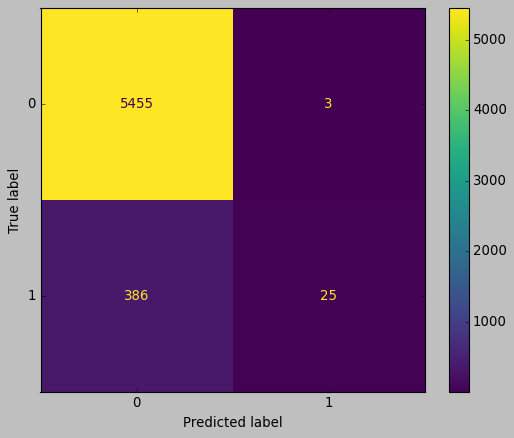

In [66]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [67]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [68]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.96
Best parameters:  {'C': 100, 'solver': 'newton-cg'}


In [70]:
y_pred = grid.predict(x_test)

In [71]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 95.37%


In [72]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[5444   14]
 [ 258  153]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.98      5458
           1       0.92      0.37      0.53       411

    accuracy                           0.95      5869
   macro avg       0.94      0.68      0.75      5869
weighted avg       0.95      0.95      0.94      5869



In [73]:
sent = 'dogs are cute'

In [74]:
print(x_test)

  (0, 206049)	0.2906967215049002
  (0, 205998)	0.30604115332267334
  (0, 205989)	0.2400398386926228
  (0, 159939)	0.31822071405023356
  (0, 159937)	0.2805896026502419
  (0, 107258)	0.31822071405023356
  (0, 106408)	0.11033417294986662
  (0, 82447)	0.31822071405023356
  (0, 82273)	0.16750918983358168
  (0, 45724)	0.30604115332267334
  (0, 45706)	0.24905452832997022
  (0, 16479)	0.31822071405023356
  (0, 16476)	0.2906967215049002
  (1, 197844)	0.7757035324698286
  (1, 197687)	0.4151827261581167
  (1, 176417)	0.47529710036328193
  (2, 200741)	0.2761746866360068
  (2, 200737)	0.16066527934457014
  (2, 189392)	0.26560439306684847
  (2, 186425)	0.052172424672617526
  (2, 178587)	0.2522873980952009
  (2, 178374)	0.1155547742725696
  (2, 166982)	0.2761746866360068
  (2, 166963)	0.20737564533248035
  (2, 129025)	0.23173266823274685
  :	:
  (5867, 42903)	0.21730953782887205
  (5867, 42879)	0.14467395629123384
  (5867, 26315)	0.1711288635995357
  (5867, 24751)	0.21730953782887205
  (5867, 24750)	

In [75]:
print(X)

  (0, 187899)	0.2551516892403603
  (0, 186425)	0.05617679787498937
  (0, 155243)	0.2973718328541142
  (0, 155240)	0.2521941711553024
  (0, 150393)	0.18784166715953
  (0, 96422)	0.2973718328541142
  (0, 96380)	0.17029100606244255
  (0, 60005)	0.2973718328541142
  (0, 59978)	0.1710601078570517
  (0, 51450)	0.2973718328541142
  (0, 51449)	0.2973718328541142
  (0, 51448)	0.2973718328541142
  (0, 51446)	0.28599024096836145
  (0, 50140)	0.2973718328541142
  (0, 50137)	0.2716511309975509
  (1, 198554)	0.22034185085231275
  (1, 198552)	0.2059249422216175
  (1, 191587)	0.22034185085231275
  (1, 191585)	0.21190849992703287
  (1, 190719)	0.07318825800611548
  (1, 190461)	0.1463934462560404
  (1, 186425)	0.0832499803355883
  (1, 186272)	0.22034185085231275
  (1, 186267)	0.1398239567735567
  (1, 174377)	0.22034185085231275
  :	:
  (29342, 70746)	0.21021009163623483
  (29342, 70743)	0.17827431508850436
  (29342, 32987)	0.21021009163623483
  (29342, 32986)	0.21021009163623483
  (29342, 6918)	0.210210

In [76]:
X = vect.transform(['roses are red'])

In [77]:
y_pred = grid.predict(X)

In [78]:
print(y_pred)

[0]


In [79]:
X = vect.transform(['all blacks are criminals'])
y_pred = grid.predict(X)
print(y_pred)

[1]


In [80]:
def getmodelprediction(sent):
    arr = []
    arr.append(sent)
    X = vect.transform(arr)
    y_pred = grid.predict(X)
    if y_pred == 0:
        return "No hate speech detected"
    elif y_pred == 1:
        return "Hate Speech detected"

In [81]:
getmodelprediction('women are bad')

'Hate Speech detected'

In [82]:
getmodelprediction('muslims are good')

'No hate speech detected'

In [83]:
getmodelprediction('jews are bad')

'Hate Speech detected'

In [84]:
getmodelprediction('women are idiots')

'Hate Speech detected'

In [87]:
getmodelprediction('immigrants are not a threat to country')

'No hate speech detected'

In [88]:
getmodelprediction('women are fools')

'Hate Speech detected'

In [95]:
getmodelprediction('black people are slaves')

'Hate Speech detected'

In [96]:
getmodelprediction('women are cowards')

'Hate Speech detected'

In [119]:
getmodelprediction('all blacks need to be deported')

'Hate Speech detected'

In [120]:
getmodelprediction('all blacks need to be welcomed with open arms')

'No hate speech detected'